In [ ]:
%load_ext autoreload
%autoreload 2

## Intro Neural Networks

#### 3Blue1Brown Videos

[What are Neural Nets](https://www.youtube.com/watch?v=aircAruvnKk)

[How Neural Nets Learn](https://www.youtube.com/watch?v=IHZwWFHWa-w)

[What is Backprop](https://www.youtube.com/watch?v=Ilg3gGewQ5U)

[Math behind Backprop](https://www.youtube.com/watch?v=tIeHLnjs5U8)

## Intro Project

[project based off](https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627)

In [1]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])


trainset = datasets.MNIST('Training_Data', download=True, train=True, transform=transform)
valset = datasets.MNIST('Testing_Data', download=True, train=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

 12%|█▏        | 1146880/9912422 [01:20<27:03, 5400.81it/s] 

In [13]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


tensor(9)

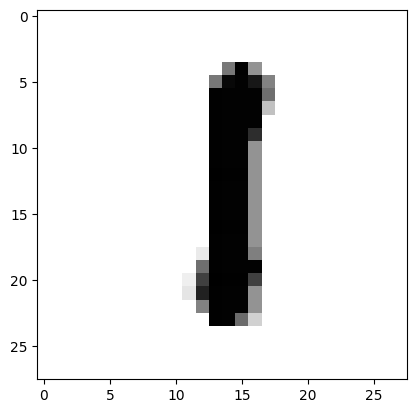

In [14]:
plt.imshow(images[1].numpy().squeeze(), cmap='gray_r');
labels[0]

In [15]:
print(labels)

tensor([9, 1, 9, 6, 8, 8, 5, 2, 4, 4, 7, 7, 1, 4, 7, 2, 3, 3, 6, 0, 6, 7, 5, 9,
        7, 3, 7, 2, 9, 8, 8, 7, 1, 3, 3, 0, 8, 1, 0, 1, 6, 1, 5, 6, 8, 1, 5, 8,
        2, 8, 7, 8, 3, 5, 9, 6, 1, 5, 5, 1, 8, 2, 5, 5])


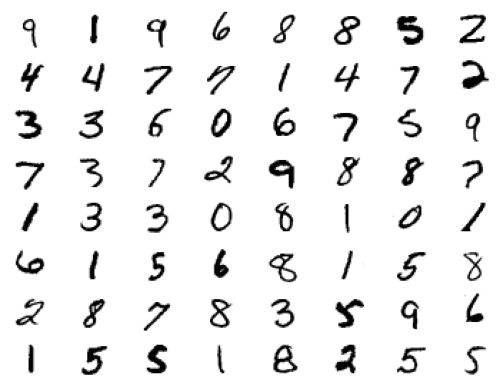

In [16]:
figure = plt.figure()
num_of_images = 64
for index in range(len(images)):
    plt.subplot(8, 8, index + 1)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [30]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x,1)

        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        return x


model = Net()

In [31]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
  
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6272492635367649
Epoch 1 - Training loss: 0.2814668390963441
Epoch 2 - Training loss: 0.21929898187279828
Epoch 3 - Training loss: 0.17549290658751213
Epoch 4 - Training loss: 0.1464396201904172
Epoch 5 - Training loss: 0.12520822098871856
Epoch 6 - Training loss: 0.10858830430114003
Epoch 7 - Training loss: 0.09690638882979782
Epoch 8 - Training loss: 0.08731873615432395
Epoch 9 - Training loss: 0.07782375173363239
Epoch 10 - Training loss: 0.07207398523818821
Epoch 11 - Training loss: 0.06677345681919662
Epoch 12 - Training loss: 0.061214422762666004
Epoch 13 - Training loss: 0.05561702125675992
Epoch 14 - Training loss: 0.05122477287448434

Training Time (in minutes) = 2.744000514348348


In [32]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9775
